In [10]:
import time
import re
import requests
import os
from pathlib import Path
from bs4 import BeautifulSoup

from PIL import Image

In [11]:
output_folder = Path('open6')
output_folder.mkdir(exist_ok=True)
urls = ['https://4.bp.blogspot.com/-p0o7JPN-eck/Vlmd_VySWSI/AAAAAAAA1IM/Byb7SLYdJQA/s800/santa_tonakai_sori.png',
       'https://2.bp.blogspot.com/-ZCsTvsjxooM/U2Luwul3zDI/AAAAAAAAfwQ/No8KXBeFofI/s800/message_yoroshiku.png',
      'https://4.bp.blogspot.com/-aOCh3m2lvJs/WEVof8kUhjI/AAAAAAABANo/nd7um4KXL3QMh7AahC2gAsGFq7sI2qvrgCLcB/s800/hologram_kira_sticker_color.png']
filenames = []
for url in urls:
    image = requests.get(url)
    filename = re.search(".*\/(.*png|.*jpg)$",url)
    filenames.append(filename.group(1))
    save_path = output_folder.joinpath(filename.group(1))
    open(save_path, 'wb').write(image.content)
    time.sleep(1.0)
print(filenames)

['santa_tonakai_sori.png', 'message_yoroshiku.png', 'hologram_kira_sticker_color.png']


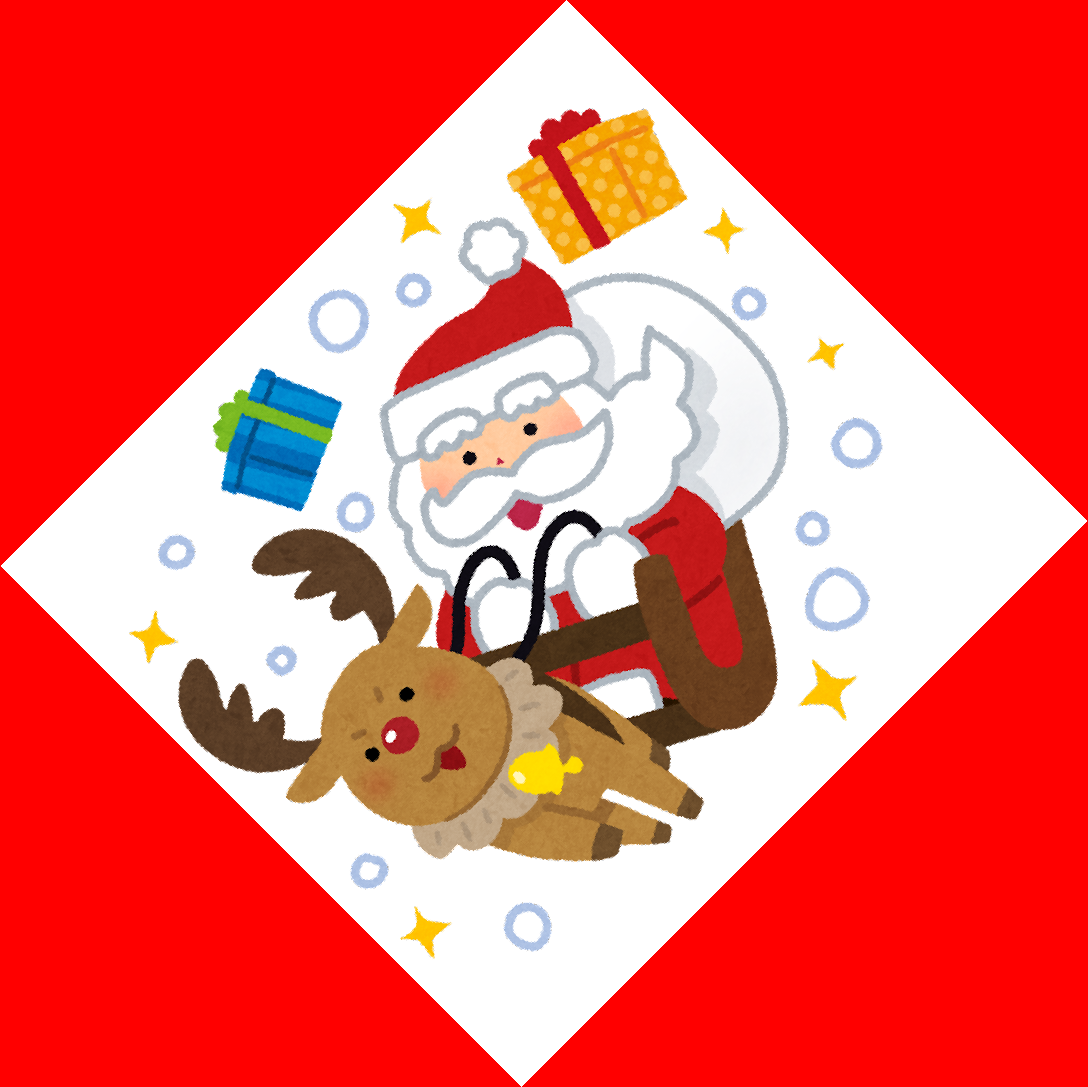

In [12]:
im = Image.open('open6/'+filenames[0])
im.rotate(45, fillcolor=(255, 0, 0), expand=True)

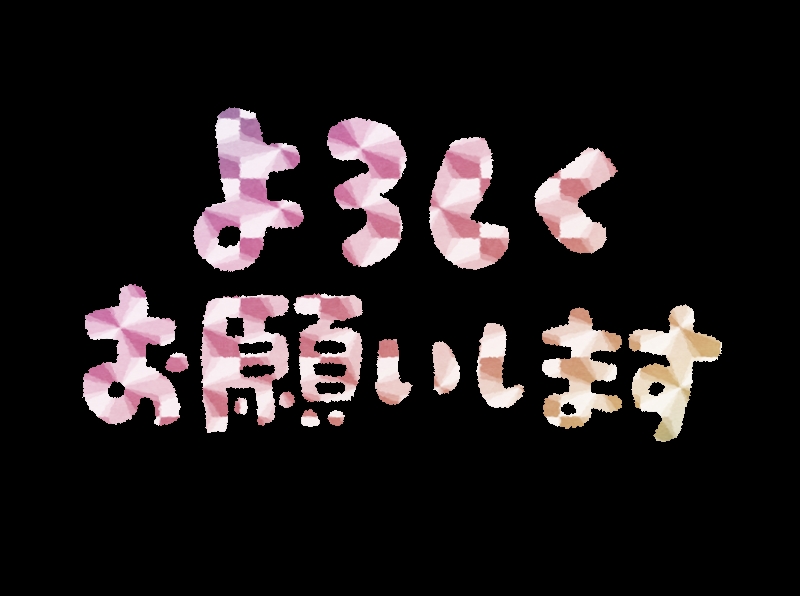

In [13]:
im_1 = Image.open('open6/'+filenames[2])
im_mask = Image.open('open6/'+filenames[1])

im_mask = im_mask.convert("L")
im_mask = im_mask.point(lambda x: 0 if x < 230 else x)

w, h = im_mask.size
im_1 = im_1.resize((w, h))

im_2 = Image.new(mode=im_1.mode, size=im_1.size, color=(0,0,0))

Image.composite(im_1, im_2, im_mask)